# **Get data from kaggle**

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fiqihalfitodev","key":"845cb03d687ea4581895ca91141ba675"}'}

In [2]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
! kaggle datasets download -d iammustafatz/diabetes-prediction-dataset

  0% 0.00/734k [00:00<?, ?B/s]
100% 734k/734k [00:00<00:00, 129MB/s]


In [4]:
! unzip diabetes-prediction-dataset.zip

Archive:  diabetes-prediction-dataset.zip
  inflating: diabetes_prediction_dataset.csv  


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [6]:
diabetes = pd.read_csv('diabetes_prediction_dataset.csv')
diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [7]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


# **Exploratory Data Analysis**

## periksa duplikasi

In [8]:
# periksa duplikasi
duplicate_rows_data = diabetes[diabetes.duplicated()]
print("jumlah baris duplikasi: ", duplicate_rows_data.shape)

jumlah baris duplikasi:  (3854, 9)


In [9]:
diabetes = diabetes.drop_duplicates()

In [10]:
diabetes.shape

(96146, 9)

## periksa missing value

In [11]:
diabetes.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [12]:
diabetes.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [13]:
# hapus nilai yang tidak perlu
diabetes = diabetes[diabetes['gender'] != 'Other']

In [14]:
diabetes.shape

(96128, 9)

## Univariate Analysis

In [15]:
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
categorical_features = ['gender', 'hypertension', 'heart_disease', 'smoking_history', 'diabetes']

print('fitur numerical: ', numerical_features)
print('fitur categorical: ', categorical_features)

fitur numerical:  ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
fitur categorical:  ['gender', 'hypertension', 'heart_disease', 'smoking_history', 'diabetes']


### Categorical Features

 
<<<===========================================================================================>>>
<<<===========================================================================================>>>
 
        jumlah sampel  persentase
Female          56161        58.4
Male            39967        41.6


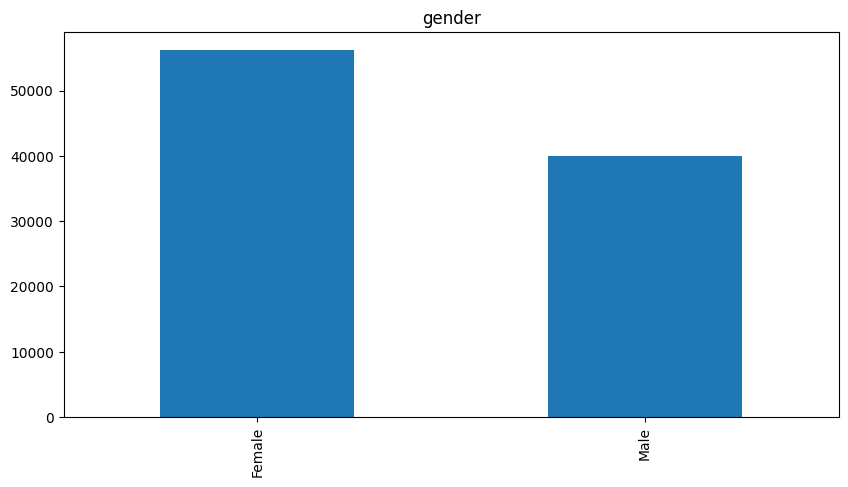

 
<<<===========================================================================================>>>
<<<===========================================================================================>>>
 
   jumlah sampel  persentase
0          88667        92.2
1           7461         7.8


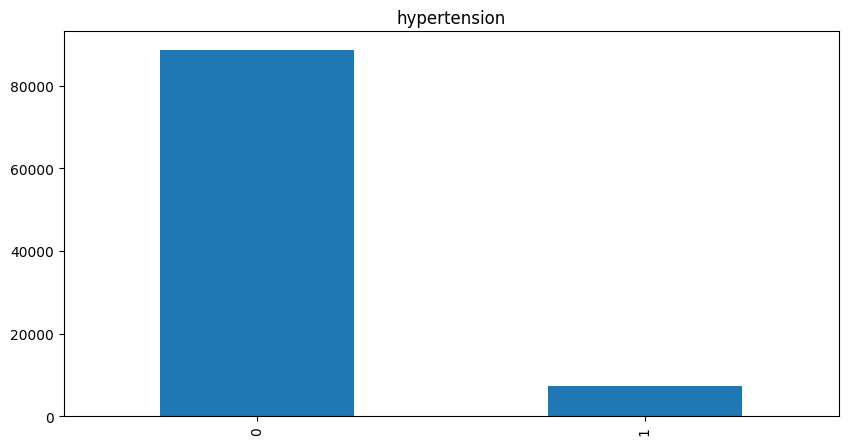

 
<<<===========================================================================================>>>
<<<===========================================================================================>>>
 
   jumlah sampel  persentase
0          92205        95.9
1           3923         4.1


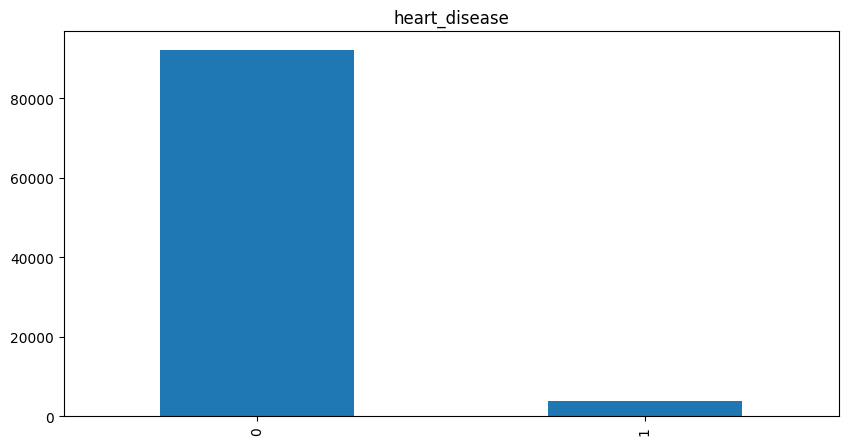

 
<<<===========================================================================================>>>
<<<===========================================================================================>>>
 
             jumlah sampel  persentase
never                34395        35.8
No Info              32881        34.2
former                9299         9.7
current               9197         9.6
not current           6359         6.6
ever                  3997         4.2


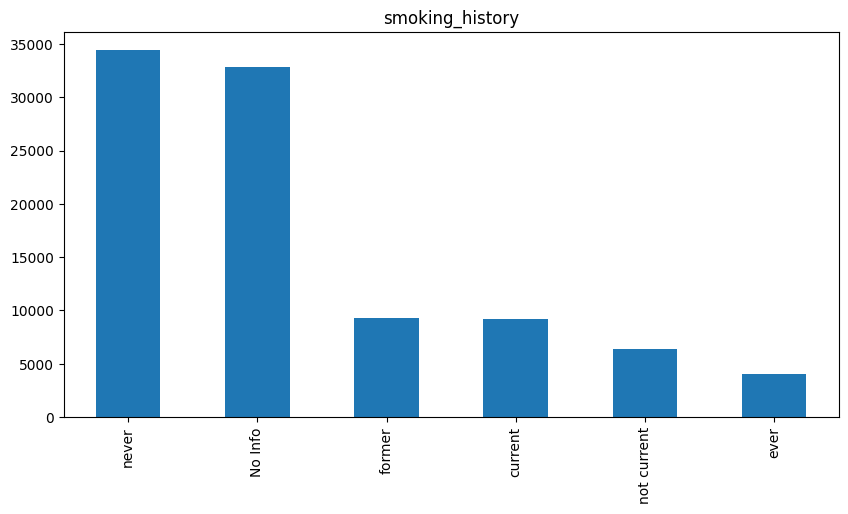

 
<<<===========================================================================================>>>
<<<===========================================================================================>>>
 
   jumlah sampel  persentase
0          87646        91.2
1           8482         8.8


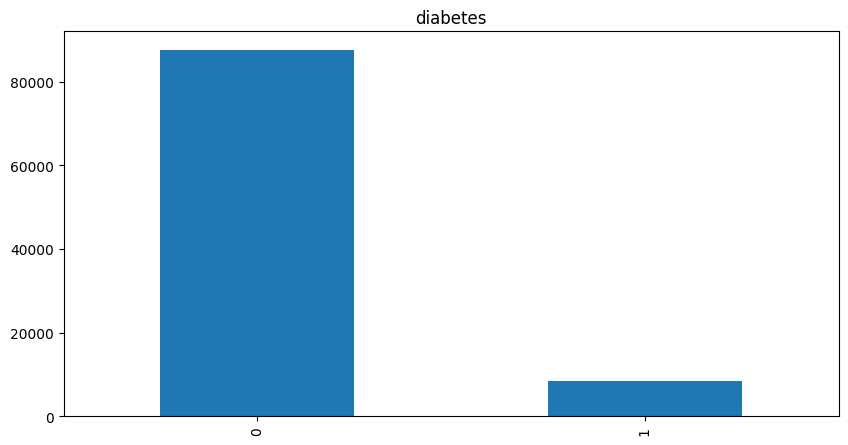

In [16]:
for feature in categorical_features:
  count = diabetes[feature].value_counts()
  percent = 100*diabetes[feature].value_counts(normalize=True)
  df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
  print(" ")
  print("<<<===========================================================================================>>>")
  print("<<<===========================================================================================>>>")
  print(" ")
  print(df)
  count.plot(kind='bar', title=feature, figsize=(10, 5));
  
  plt.show()

### Numerical Features

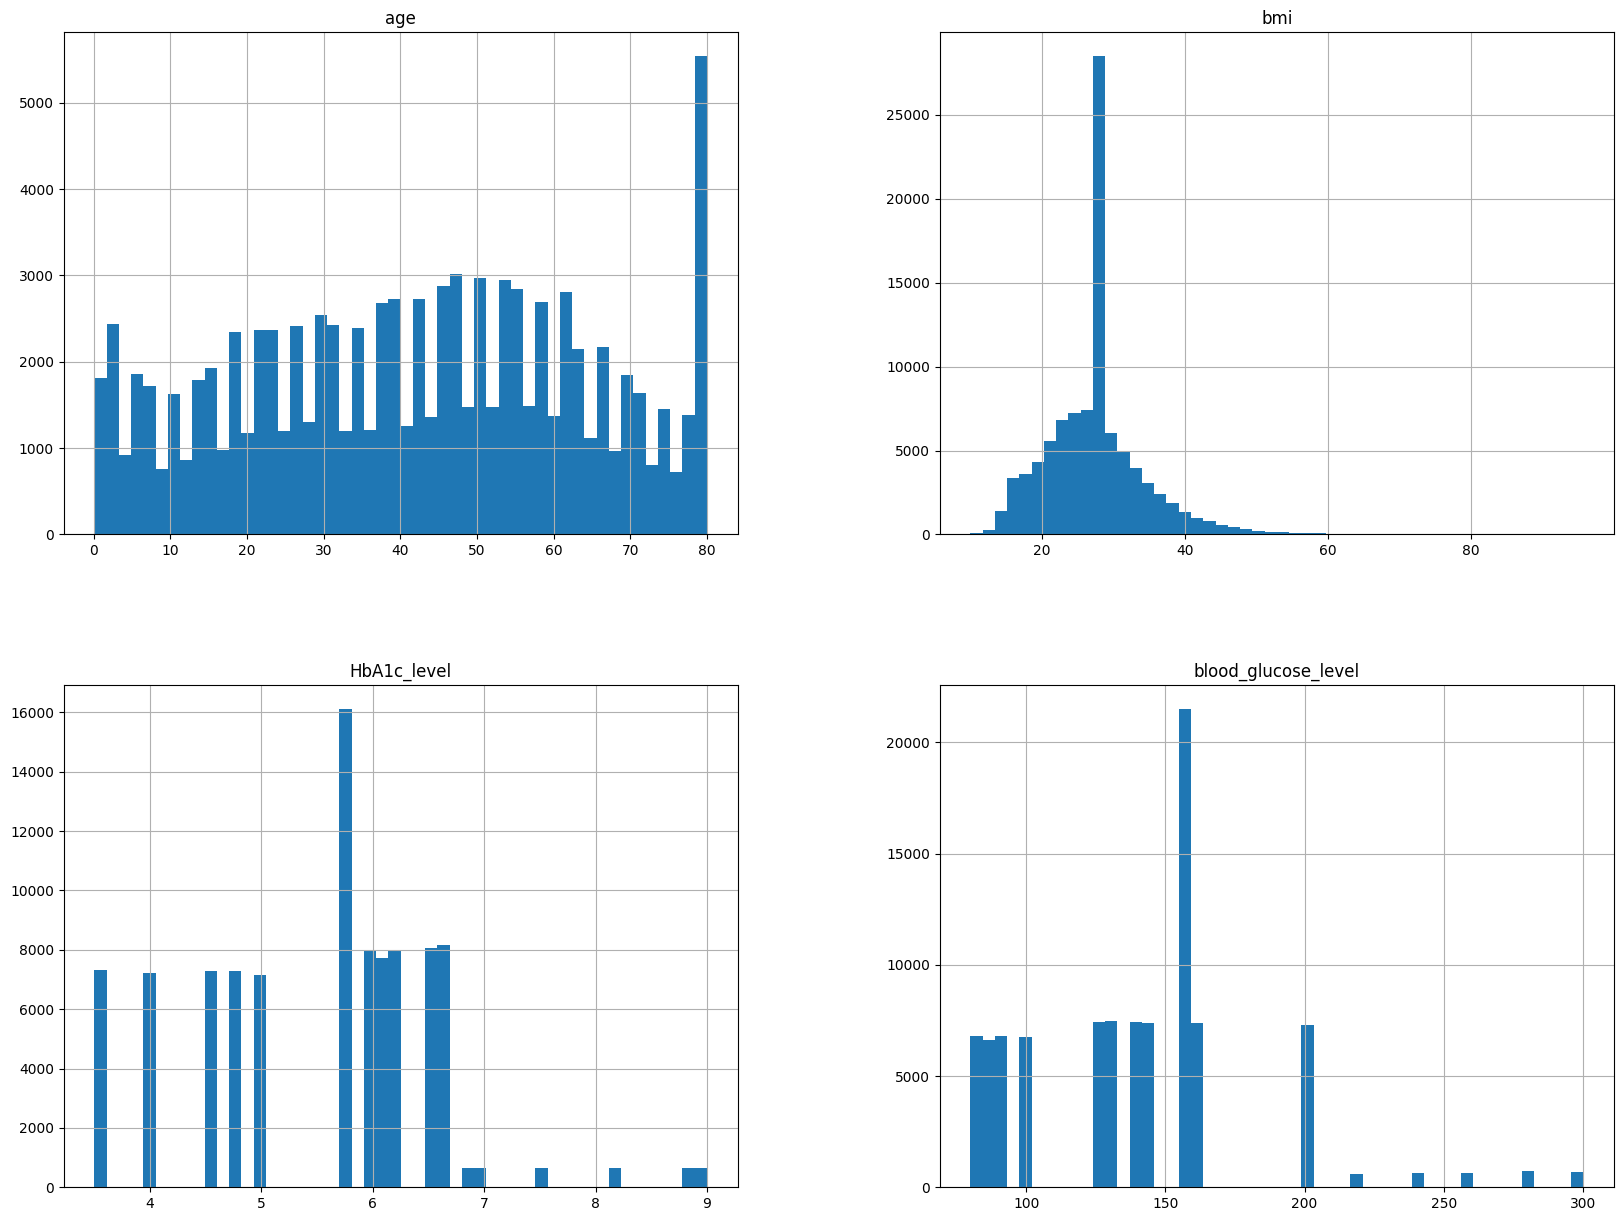

In [17]:
diabetes[numerical_features].hist(bins=50, figsize=(20,15))
plt.show()

## Bivariate Analysis

### **Diabetes and gender**

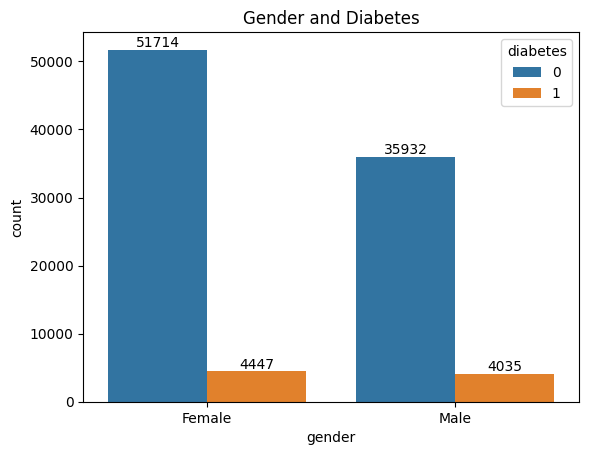

In [18]:
ax=sns.countplot(x='gender', hue='diabetes', data=diabetes)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Gender and Diabetes')
plt.show()

### **Diabetes and age**

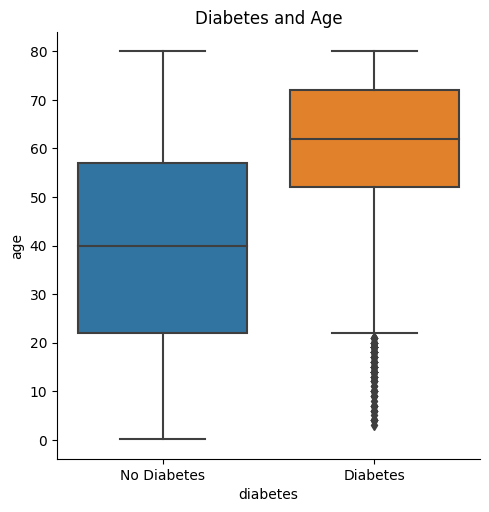

In [19]:
ax = sns.catplot(kind='box', data=diabetes, x='diabetes', y='age')
ax.set(title='Diabetes and Age')
ax.set_xticklabels(['No Diabetes', 'Diabetes'])

### **Diabetes and Hypertension**

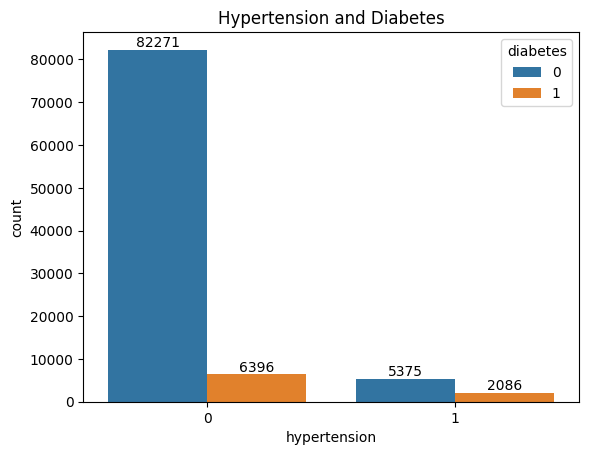

In [20]:
ax=sns.countplot(x='hypertension', hue='diabetes', data=diabetes)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Hypertension and Diabetes')
plt.show()

### **Diabetes and Heart Disease**

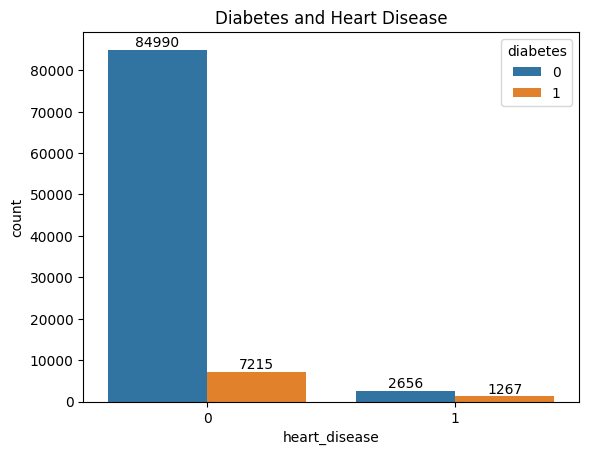

In [21]:
ax=sns.countplot(x='heart_disease', hue='diabetes', data=diabetes)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Diabetes and Heart Disease')
plt.show()

### **Diabetes and Smoking History**

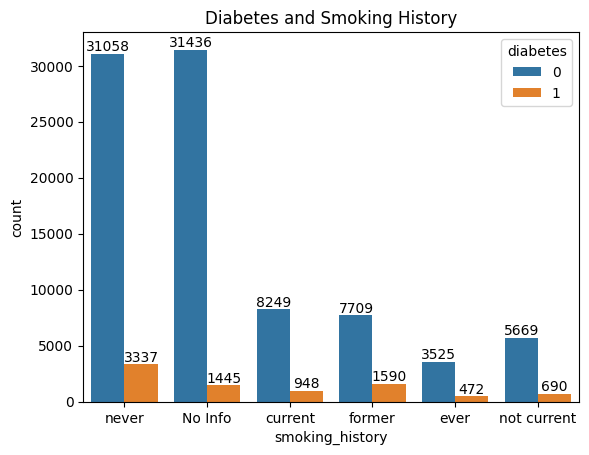

In [22]:
ax=sns.countplot(x='smoking_history', hue='diabetes', data=diabetes)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Diabetes and Smoking History')
plt.show()

### **Diabetes and BMI**

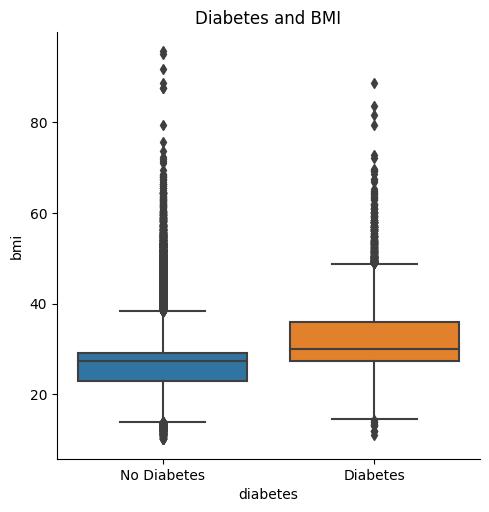

In [23]:
ax = sns.catplot(kind='box', data=diabetes, x='diabetes', y='bmi')
ax.set(title='Diabetes and BMI')
ax.set_xticklabels(['No Diabetes', 'Diabetes'])

### **Diabetes and HbA1c Level**

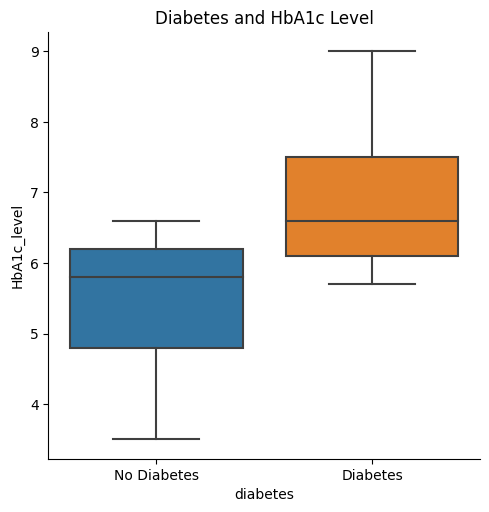

In [24]:
ax = sns.catplot(data=diabetes, x='diabetes', y='HbA1c_level', kind='box')
ax.set(title='Diabetes and HbA1c Level')
ax.set_xticklabels(['No Diabetes', 'Diabetes'])

### **Diabetes and Blood Glucose Level**

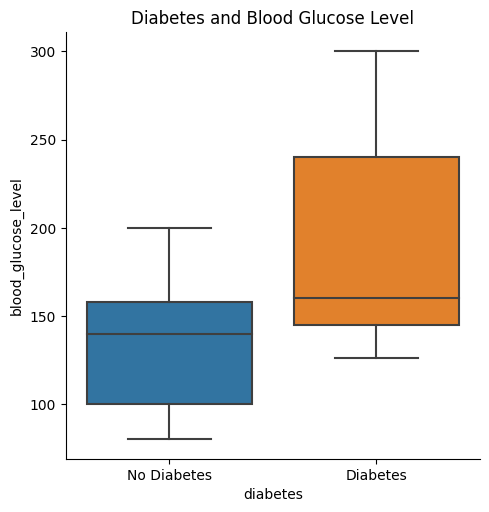

In [25]:
ax = sns.catplot(data=diabetes, x='diabetes', y='blood_glucose_level', kind='box')
ax.set(title='Diabetes and Blood Glucose Level')
ax.set_xticklabels(['No Diabetes', 'Diabetes'])

## Multivariate Analysis

### Numerical Features

<ipython-input-26-3418dd0e8f60>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = diabetes.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

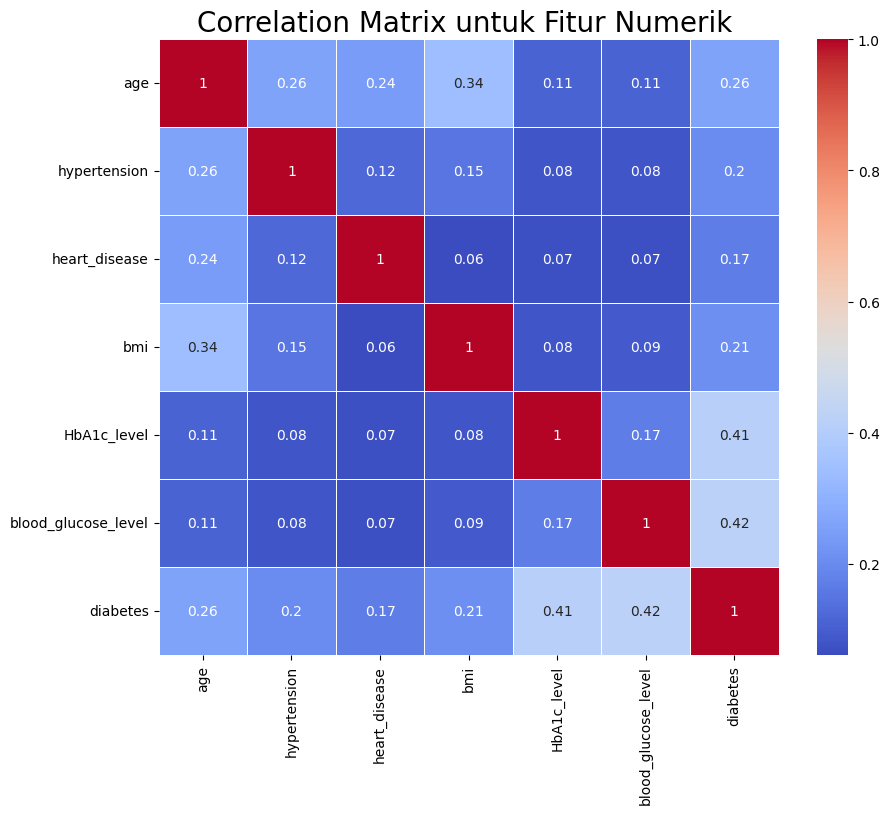

In [26]:
plt.figure(figsize=(10, 8))
correlation_matrix = diabetes.corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

drop fitur dengan korelasi paling kecil yaitu fitur 'heart_disease'

In [27]:
diabetes.drop(['heart_disease'], inplace=True, axis=1)
diabetes.head()

,gender,age,hypertension,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,never,25.19,6.6,140,0
1,Female,54.0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,never,27.32,5.7,158,0
3,Female,36.0,0,current,23.45,5.0,155,0
4,Male,76.0,1,current,20.14,4.8,155,0


# Data Preparation

## Encoding Fitur Kategori

In [28]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96128 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96128 non-null  object 
 1   age                  96128 non-null  float64
 2   hypertension         96128 non-null  int64  
 3   smoking_history      96128 non-null  object 
 4   bmi                  96128 non-null  float64
 5   HbA1c_level          96128 non-null  float64
 6   blood_glucose_level  96128 non-null  int64  
 7   diabetes             96128 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 6.6+ MB


In [29]:
diabetes.head()

,gender,age,hypertension,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,never,25.19,6.6,140,0
1,Female,54.0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,never,27.32,5.7,158,0
3,Female,36.0,0,current,23.45,5.0,155,0
4,Male,76.0,1,current,20.14,4.8,155,0


In [30]:
from sklearn.preprocessing import OneHotEncoder

diabetes = pd.concat([diabetes, pd.get_dummies(diabetes['gender'], prefix='gender')],axis=1)
diabetes = pd.concat([diabetes, pd.get_dummies(diabetes['smoking_history'], prefix='smoking_history')],axis=1)

diabetes.drop(['gender', 'smoking_history'], axis=1, inplace=True)
diabetes.head()

,age,hypertension,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,25.19,6.6,140,0,1,0,0,0,0,0,1,0
1,54.0,0,27.32,6.6,80,0,1,0,1,0,0,0,0,0
2,28.0,0,27.32,5.7,158,0,0,1,0,0,0,0,1,0
3,36.0,0,23.45,5.0,155,0,1,0,0,1,0,0,0,0
4,76.0,1,20.14,4.8,155,0,0,1,0,1,0,0,0,0


## Train-Test-Split

In [31]:
from sklearn.model_selection import train_test_split
 
X = diabetes.drop(["diabetes"],axis=1)
y = diabetes["diabetes"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [32]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 96128
Total # of sample in train dataset: 86515
Total # of sample in test dataset: 9613


## Standarisasi

In [33]:
from sklearn.preprocessing import StandardScaler
 
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,age,bmi,HbA1c_level,blood_glucose_level
4238,0.363626,0.041486,0.247281,0.531065
437,0.452705,0.000083,-0.497904,0.506657
12392,0.497244,4.237982,0.154133,-0.201173
42772,-0.349000,1.256962,-0.963645,0.531065
4083,-1.061626,-0.805798,-0.684200,-0.201173


In [34]:
X_train[numerical_features].describe().round(2)

,age,bmi,HbA1c_level,blood_glucose_level
count,86515.00,86515.00,86515.00,86515.00
mean,0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00
min,-1.86,-2.56,-1.90,-1.42
25%,-0.79,-0.58,-0.68,-0.93
50%,0.05,0.00,0.25,0.04
75%,0.76,0.37,0.62,0.51
max,1.70,10.04,3.23,3.95


# **Model Development**

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [36]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(columns=['train_accuracy_score', 'test_accuracy_score'], 
                      index=['KNN', 'RandomForest', 'Boosting'])


## Model K-Nearest Neighbor

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

models.loc['KNN', 'train_accuracy_score'] = accuracy_score(y_pred=knn.predict(X_train), y_true=y_train).round(4)

## Model Random Forest

In [38]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestClassifier

 
# buat model prediksi
# RF = RandomForestClassifier(n_estimators=78, max_depth=13)
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
 
models.loc['RandomForest', 'train_accuracy_score'] = accuracy_score(y_pred=RF.predict(X_train), y_true=y_train).round(4)

## Model Boosting

In [39]:
from sklearn.ensemble import AdaBoostClassifier
 
boosting = AdaBoostClassifier()                             
boosting.fit(X_train, y_train)
models.loc['Boosting', 'train_accuracy_score'] = accuracy_score(y_pred=boosting.predict(X_train), y_true=y_train).round(4)

# **Evaluasi Model**

In [40]:
# sebelum standarisasi data uji
X_test.describe().round(2)

,age,hypertension,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
count,9613.00,9613.00,9613.00,9613.00,9613.00,9613.00,9613.00,9613.00,9613.00,9613.00,9613.00,9613.00,9613.00
mean,41.44,0.08,27.34,5.52,138.00,0.58,0.42,0.35,0.10,0.04,0.09,0.36,0.07
std,22.56,0.26,6.81,1.07,40.37,0.49,0.49,0.48,0.29,0.20,0.29,0.48,0.25
min,0.08,0.00,10.19,3.50,80.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,23.00,0.00,23.40,4.80,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,43.00,0.00,27.32,5.80,140.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,59.00,0.00,30.00,6.20,159.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00
max,80.00,1.00,95.69,9.00,300.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [41]:
# standarisasi data uji
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [42]:
# setelah standarisasi data uji
X_test.describe().round(2)

,age,hypertension,bmi,HbA1c_level,blood_glucose_level,gender_Female,gender_Male,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
count,9613.00,9613.00,9613.00,9613.00,9613.00,9613.00,9613.00,9613.00,9613.00,9613.00,9613.00,9613.00,9613.00
mean,-0.02,0.08,0.00,-0.02,-0.01,0.58,0.42,0.35,0.10,0.04,0.09,0.36,0.07
std,1.00,0.26,1.01,1.00,0.99,0.49,0.49,0.48,0.29,0.20,0.29,0.48,0.25
min,-1.86,0.00,-2.53,-1.90,-1.42,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-0.84,0.00,-0.58,-0.68,-0.93,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.05,0.00,0.00,0.25,0.04,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.76,0.00,0.40,0.62,0.51,1.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00
max,1.70,1.00,10.11,3.23,3.95,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


prediksi data uji dan hitung accuracy_score untuk data uji

In [43]:
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RandomForest': RF, 'Boosting': boosting}

# buat df untuk membantu membuat confusion matrix
y_preds = pd.DataFrame(columns=['KNN', 'RandomForest', 'Boosting'])


for name, model in model_dict.items():
  # prediksi data uji dengan model
  y_pred = model.predict(X_test)
  
  # simpan test_accuracy_score berdasarkan nama model
  models.loc[name, 'test_accuracy_score'] = accuracy_score(y_pred=y_pred, y_true=y_test).round(4)

  # simpan setiap prediksi berdasarkan nama model
  y_preds[name] = y_pred

models

,train_accuracy_score,test_accuracy_score
KNN,0.9691,0.9597
RandomForest,0.9989,0.9679
Boosting,0.9709,0.9707
